# Autoencodeur 

Objectif : construire un autoencodeur de débruitage en utilisant Keras :
- On bruite l'entrée
- La sortie est l'image non bruitée
Utilisation du mode Sequentiel

## MNIST 

La base de données MNIST (Mixed National Institute of Standards and Technology), est une base de données de chiffres manuscrits. C’est une base de données standard pour le test de nouveaux algorithmes de reconnaissance de ces chiffres. Elle est composée de 60000 images d’apprentissage et 10000 images de test. Les images en noir et blanc, normalisées centrées de 28 pixels de côté.

![mnist.png](./mnist.png)

In [25]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow.keras as tk
from tensorflow.keras.datasets import mnist

from tensorflow.keras.layers import Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Model

from tensorflow.keras.optimizers import Adam

On charge ensuite les données MNIST. Les paramètres de la base sont récupérés (nombre d'exemples, de classes, taille de la rétine).

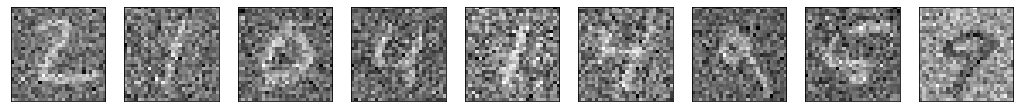

In [26]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()


num_examples = x_train.shape[0] 
num_test = x_test.shape[0]
num_input = x_train.shape[1]*x_train.shape[2]
num_classes = 10

img_size = x_train.shape[1] 
img_shape = (img_size, img_size)


# normalisation
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))


# bruit
#TODO 

plt.figure(figsize=(20, 2))
for i in range(1,10):
    ax = plt.subplot(1, 10, i)
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    plt.imshow(x_test_bruitee[i].reshape(28, 28), cmap="binary")
plt.show()

## Autoencodeur à couches convolutives


In [27]:
batch_size = 256
num_epochs = 5

#TODO



In [28]:
model.compile(optimizer=Adam(1e-3), loss='binary_crossentropy',metrics=['acc'])
model.summary()


Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 7, 7, 64)          36928     
_________________________________________________________________
up_sampling2d_2 (UpSampling2 (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 14, 14, 32)       

Epoch 1/5
235/235 [==============================] - 49s 207ms/step - loss: 0.1758 - acc: 0.8020 - val_loss: 0.1150 - val_acc: 0.8099
Epoch 2/5
235/235 [==============================] - ETA: 0s - loss: 0.1105 - acc: 0.8116
Epoch 0 Précision :0.812 


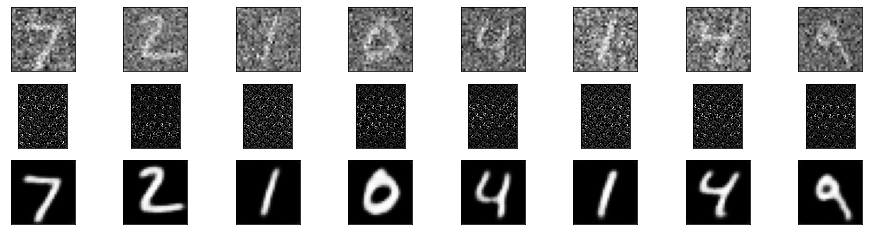

235/235 [==============================] - 57s 243ms/step - loss: 0.1105 - acc: 0.8116 - val_loss: 0.1052 - val_acc: 0.8113
Epoch 3/5
235/235 [==============================] - 51s 216ms/step - loss: 0.1045 - acc: 0.8124 - val_loss: 0.1018 - val_acc: 0.8116
Epoch 4/5
235/235 [==============================] - ETA: 0s - loss: 0.1016 - acc: 0.8128
Epoch 2 Précision :0.813 


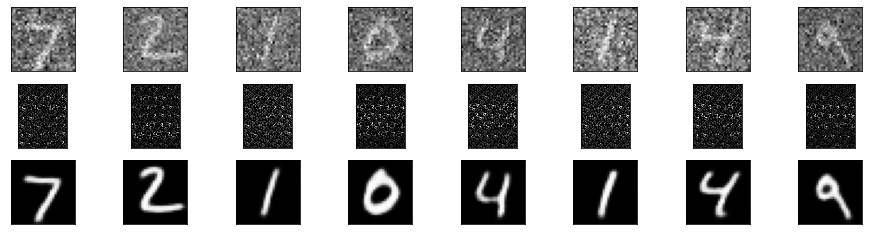

235/235 [==============================] - 62s 264ms/step - loss: 0.1016 - acc: 0.8128 - val_loss: 0.0996 - val_acc: 0.8121
Epoch 5/5
235/235 [==============================] - 54s 231ms/step - loss: 0.0999 - acc: 0.8130 - val_loss: 0.0983 - val_acc: 0.8120
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: autoencodeur_debruitage.model/assets


In [29]:
from tensorflow.keras import backend as K
class myCallback(tk.callbacks.Callback): 
    def on_epoch_end(self, epoch, logs={}): 
        encoder = K.function([model.layers[0].input],[model.layers[3].output])
        if((epoch-1) % 2==0):   
            print("\nEpoch {0:d} Précision :{1:5.3f} ".format(epoch-1,logs.get('acc') ))
            decoded_imgs = model.predict(x_test)
            encoded_imgs = encoder([x_test_bruitee])[0]


            n = 8  
            plt.figure(figsize=(40, 4))
            for i in range(n):
                ax = plt.subplot(3, 20, i + 1)
                plt.imshow(x_test_bruitee[i].reshape(28, 28))
                plt.gray()
                ax.get_xaxis().set_visible(False)
                ax.get_yaxis().set_visible(False)

                ax = plt.subplot(3, 20, i + 1 + 20)
                plt.imshow(encoded_imgs[i].reshape(64,49))
                plt.gray()
                ax.get_xaxis().set_visible(False)
                ax.get_yaxis().set_visible(False)

                ax = plt.subplot(3, 20, 2*20 +i+ 1)
                plt.imshow(decoded_imgs[i].reshape(28, 28))
                plt.gray()
                ax.get_xaxis().set_visible(False)
                ax.get_yaxis().set_visible(False)

            plt.show()

            
callbacks = myCallback()
model.fit(x_train_bruitee,x_train,epochs=num_epochs,batch_size=batch_size,validation_data=(x_test_bruitee, x_test),callbacks=[callbacks])
model.save('autoencodeur_debruitage.model')


In [30]:
model.evaluate(x_test_bruitee, x_test)


313/313 [==============================] - 6s 19ms/step - loss: 0.0983 - acc: 0.8120


[0.09828861057758331, 0.8120403289794922]

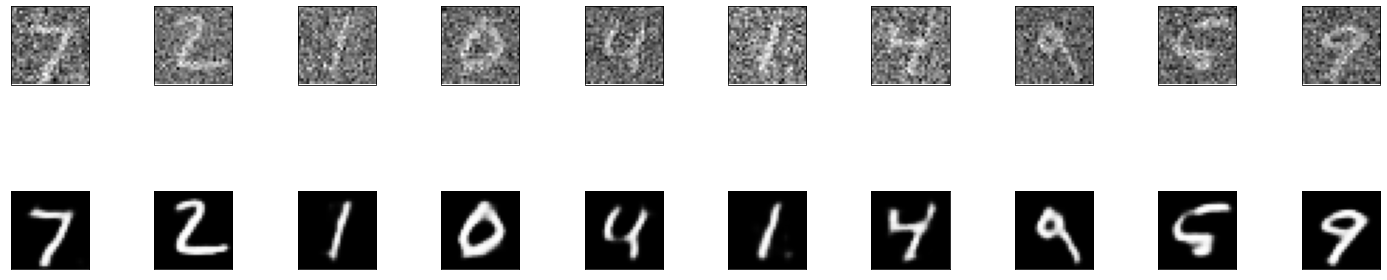

In [40]:
img_debruitee = model.predict(x_test_bruitee)
plt.figure(figsize=(40, 4))
for i in range(10):
    ax = plt.subplot(3, 20, i + 1)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    plt.imshow(x_test_bruitee[i].reshape(28, 28))
    
    ax = plt.subplot(3, 20, 40 +i+ 1)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    plt.imshow(img_debruitee[i].reshape(28, 28))

plt.tight_layout()